<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/NFLX_financialdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [ ]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("NFLX")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-06 00:00:00-05:00,972.989990,973.690002,899.000000,906.359985,7852600,0.0,0.0
2025-03-07 00:00:00-05:00,897.640015,904.890015,858.070007,891.109985,7737500,0.0,0.0
2025-03-10 00:00:00-04:00,875.070007,881.270020,854.500000,866.679993,6995300,0.0,0.0
2025-03-11 00:00:00-04:00,867.409973,910.679993,866.000000,895.099976,7398900,0.0,0.0
2025-03-12 00:00:00-04:00,914.599976,927.179993,901.000000,919.679993,6865800,0.0,0.0


## Get the Balance Sheet and Income Statements

In [ ]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                           2024-12-31     2023-12-31     2022-12-31  \
Treasury Shares Number     24784254.0     16078268.0      1564478.0   
Ordinary Shares Number    427757100.0    432759584.0    445346776.0   
Share Issued              452541354.0    448837852.0    446911254.0   
Net Debt                 7778071000.0   7426348000.0   9205900000.0   
Total Debt              15582804000.0  14543261000.0  14353076000.0   

                           2021-12-31 2020-12-31  
Treasury Shares Number      1564478.0        NaN  
Ordinary Shares Number    443963107.0        NaN  
Share Issued              445527585.0        NaN  
Net Debt                 9365091000.0        NaN  
Total Debt              15392895000.0        NaN  

Income Statement:
                                                       2024-12-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.13   
Normalized EBITDA         

In [ ]:
apple = yf.Ticker("NFLX")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("NFLX")
AAPL = apple.history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

In [ ]:
print(META.Close.mean())
META.describe()

300.2422948335027


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,300.078645,304.300185,296.060906,300.242295,2.315541e+07,0.001591,0.0
std,124.856234,125.814469,123.529762,124.713439,1.572882e+07,0.028172,0.0
min,89.737209,90.115760,87.754774,88.571663,4.726100e+06,0.000000,0.0
25%,208.045287,210.794791,205.724145,208.981705,1.453120e+07,0.000000,0.0
50%,278.097672,284.144607,275.228618,279.761322,1.938320e+07,0.000000,0.0
75%,345.310940,350.760165,341.874050,344.972229,2.711680e+07,0.000000,0.0
max,630.991005,637.885465,626.704485,632.170044,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [ ]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,301.194885
2020-01-03 00:00:00-05:00,298.914185
2020-01-06 00:00:00-05:00,300.054626
2020-01-07 00:00:00-05:00,299.210846
2020-01-08 00:00:00-05:00,300.805511
...,...
2024-12-23 00:00:00-05:00,594.690002
2024-12-24 00:00:00-05:00,601.299988
2024-12-26 00:00:00-05:00,601.340027


In [ ]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2024-12-23 00:00:00-05:00,594.690002,254.989655,17.250000,911.450012,599.849976,85.269997
2024-12-24 00:00:00-05:00,601.299988,257.916443,17.350000,932.119995,607.750000,85.669998
2024-12-26 00:00:00-05:00,601.340027,258.735504,17.350000,924.140015,603.349976,85.440002
2024-12-27 00:00:00-05:00,595.010010,255.309296,17.350000,907.549988,599.809998,83.820000
2024-12-30 00:00:00-05:00,588.219971,251.923019,17.620001,900.429993,591.239990,82.730003


In [ ]:
# print(NFLX)
# print(NFLX.shift(1))

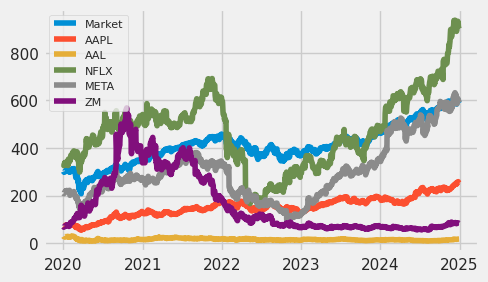

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [ ]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009769,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002816,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000


## Find the betas of the stocks. The formula is shown below:

In [ ]:
beta_nflx = (data[['Market','NFLX']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_nflx

1.0479750953954063

### Calculate beta using regression line.

In [ ]:
beta, alpha = np.polyfit(data['Market'], data['NFLX'], 1)
alpha
beta

1.0479750953954075

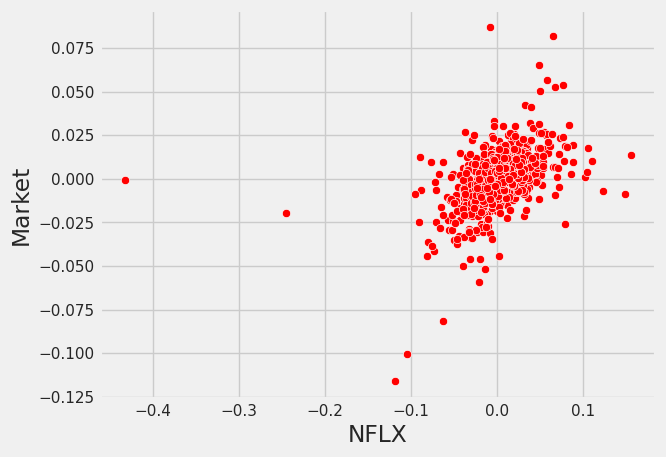

In [ ]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'NFLX', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='NFLX'>

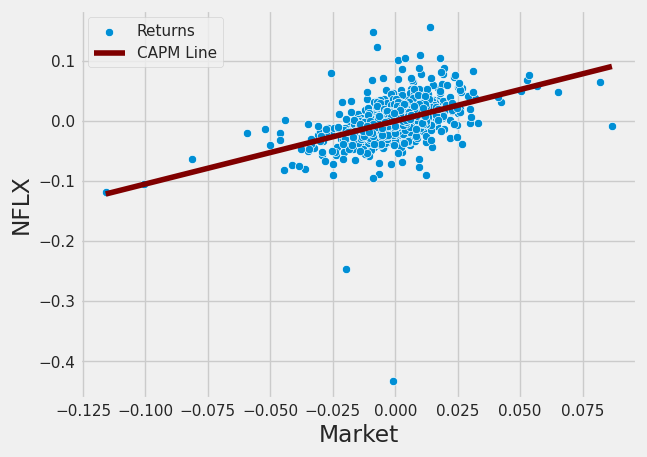

In [ ]:
sns.scatterplot(y = 'NFLX', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_nflx, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [ ]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','NFLX']].cov() *252
cov_nflx_market = cov.iloc[0,1]
cov_nflx_market
market_var = data['Market'].var()*252
market_var

NFLX_beta_annual = cov_nflx_market / market_var
print('The annualized beta will ewual the one calculated at daily returns:',NFLX_beta_annual)

rm



The annualized beta will ewual the one calculated at daily returns: 1.0479750953954063


0.13418818833113264

In [ ]:
rf = 0.025
riskpremium = rm - rf

## CAPM
NFLX_capm_return = rf + NFLX_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized CAPM return of AAPL is 15.49%


In [ ]:
sharperatio = (rm-rf)/(data['NFLX'].std()*np.sqrt(252))
sharperatio
print(f"Sharpe Ratio: {round(sharperatio,4)}")

Sharpe Ratio: 0.233
